# **Introduction to Data Analytics Group Project**


# **Prediction of Alzheimer's Disease**

**Team Members:**
*   Huda Mohammed Bilal - 202211270
*   Lubna Sher Aslam - 202120102
*   Ramla Ahmed Mohamed - 202211027
*   Areesha Fatima Muhammad Zeeshan - 202220265

# Introduction

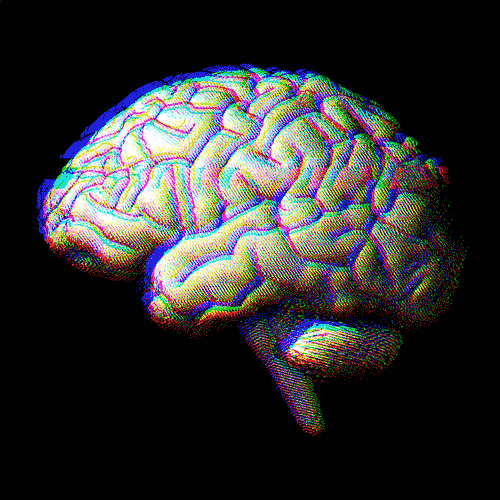

Alzheimer's disease is the most common type of dementia. It is a progressive disease beginning with mild memory loss and possibly leading to loss of the ability to carry on a conversation and respond to the environment. The patients in our dataset are classfied into 3 types:

*  Demented - Individuals who have dementia and have been diagnosed with Alzheimer's disease or any other form of dementia.
*  Non-Demented - Individuals who do not have dementia and have not been diagnosed with Alzheimer's disease or any other form of dementia.
*  Converted - Individuals who have progressed from mild cognitive impairment (MCI) to a diagnosis of Alzheimer's disease.

# Project Goal - Predict Alzheimer's Disease using Patient Data.

## Summary

The main question of our project is to predict whether the patients in our dataset have alzheimers (demented) or don't  have alzheimers (non-demented) or if they have progressed from MCI to having Alzheimers (converted). In order to get to know our dataset well, we have deleted the missing values and performed few data visualization graphs. In order to acheive our main goal, we have performed KNN algorithm on our dataset. We have encoded the 'M/F' column, and performed a 70/30 train test split on our data. We have also normalized our data using the MinMaxScaler(). After normalization, we have trained our model with 3 K-neighbors. Finally, we have tested our model, and analyzed it using the Classfication Report, Confusion Matrix and Accuracy Score

**Here is a short description of our data:**

Our dataset contains 10 columns and 373 rows.

*   Group --> Class
*   M/F --> Gender
*   Age --> Age
*   EDUC --> Years of Education
*   SES --> Socioeconomic Status / 1-5
*   MMSE --> Mini Mental State Examination
*   CDR --> Clinical Dementia Rating
*   eTIV --> Estimated total intracranial volume
*   nWBV --> Normalize Whole Brain Volume
*   ASF --> Atlas Scaling Factor


 Group is a target for models

categorical variables:
*  Group
*  Age
*  EDUC



# Reading our CSV File

In [ ]:
import pandas as pd
import numpy as np
mydata = pd.read_csv("alzheimer.csv")
mydata

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In the above code, we are importing the pandas library as pd and the numpy library as np. After we have imported them, we are loading our "Alzheimers.csv" file by read_csv function. As we can see from the displayed data, we have 373 rows and 10 columns.

# Deleting Missing Values

In [ ]:
mydata.isna()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
368,False,False,False,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False


As we can see from the above code, we have few missing values in our dataset. The isna() function returned a dataframe of boolean values: True indicating missing values (NaN) and False indicating Not a missing value. To further work on our data, either we can delete the rows containing these missing values or we can also use imputation to replace these missing values. In our datase, we have deleted these missing values by using the dropna() function that deletes each rows containing atleast 1 missing values.

In [ ]:
mydata = mydata.dropna()
mydata.isna().sum()


Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

After we have dropped them, just for checking if the missing values are still there we have applied the sum() function on isna() function to give a sum of missing values in each feature. As we can see, there are no missing values anymore.

# Getting to know our dataset

## What is the age and gender of the oldest and the youngest person in the dataset?

In [ ]:
max_idxage = mydata["Age"].idxmax(axis = 0, skipna = True)
max_g = mydata.at[max_idxage,"M/F"]
print("The Age of the oldest person in my data is: ", mydata["Age"].max(), ", and their gender is: ", max_g)
min_idxage = mydata["Age"].idxmin(axis = 0, skipna = True)
min_g = mydata.at[min_idxage,"M/F"]
print("The Age of the youngest person in my data is: ", mydata["Age"].min(), ", and their gender is: ", min_g)

The Age of the oldest person in my data is:  98 , and their gender is:  F
The Age of the youngest person in my data is:  60 , and their gender is:  F


We first got the index of the maximum age in the "Age" column which is the oldest person. Using that index, we got the value of the "M/F" column which is the gender column of that row by the 'at' method. We applied the same logic for getting the age and gender of the youngest person.

# Plots and Graphs

## Is there any relationship between the "eTIV" feature and "nWBV" feature?

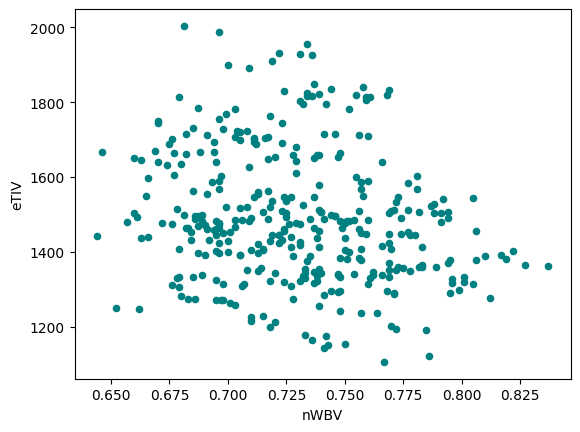

In [ ]:
scatter_plot = mydata.plot.scatter(y = "eTIV", x = "nWBV",color = "Teal")

By using scatterplot we determined whether there is a relationship between the two specified features. Looking at the graph above, we can conclude that there is no relatioship between "eTIV" and "nWBV" because the graph is very scattered and not leading towards a certain direction, so they both are not dependent on each other.

## What is the age of the majority of the patients in the dataset?

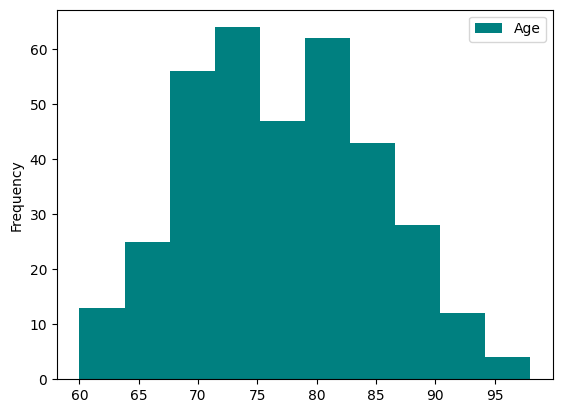

In [ ]:
bar_graph = mydata.plot.hist(y = "Age", color = "Teal")

As we can see from the above graph, most of the patients fall in the age interval 68 - 83 in our dataset due to higher frequency.

## What is the median of the "eTIV" column (using a grapgh)?

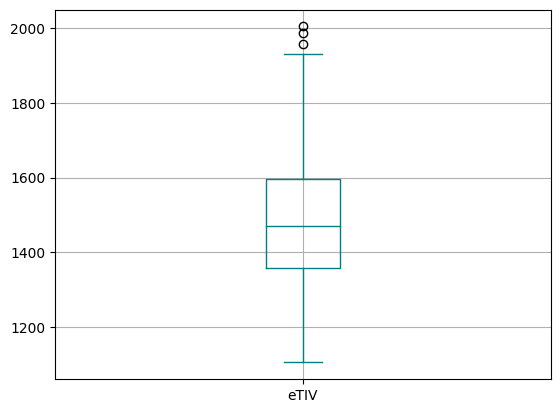

In [ ]:
box_plot = mydata.boxplot(column = "eTIV", color = "Teal")

From the boxplot, we would assume that the median is approximately 1479.

In [ ]:
med_etiv = mydata["eTIV"].median()
print("The median of eTIV is: ", med_etiv)

The median of eTIV is:  1470.5


Our assumption was quite close to the actual median value which is 1470.5.

## What gender do majority of the patients belong to?

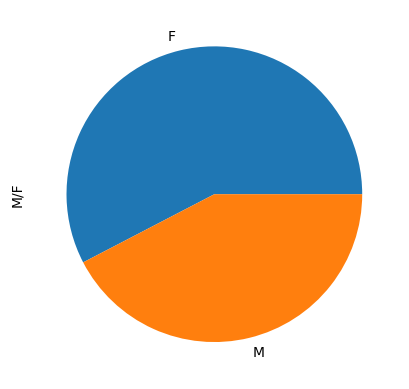

In [ ]:
g_pie = mydata["M/F"].value_counts().plot(kind = "pie")


From the above pie chart, we can understand that the majority of the patients are Females. We can say that 5/8th of the patients are Females.

# Encoding and deleting some columns


In [ ]:
mydata = mydata.replace(to_replace = ["M", "F"], value = [1, 0])
mydata

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


Since, Females have higher chance of getting more affected by Alzheimers, the gender feature is important to be included in our model. Our model cannot take classes or strings as our training data, because our training data needs to be normalized or standardized. Therefore, we are encoding our Gender feature to 1 for males and 0 for females.

In [ ]:
mydata = mydata.drop(["Age", "EDUC"], axis = 1)

Eventhough, Older people are much more likely to be affected by alzheimers, our data mostly contains old people above 59 years of age. So we are going to be dropping the "Age" column. We are also going to be dropping the "EDUC" feature which is Years of Education as it can be consdered a categorical feature. The "Age" and "EDUC" feature don't have much influence on the accuracy of our model. Hence, they can be dropped.

# KNN

To classify or predict whether our the patients are demented, non-demented or converted, we are going to be using the K-Nearest Neighbors algorithm. Since, our data already has a column or a feature containing these classes or labels which needs to be predicted and these classes are categorical we are using KNN.  (If we were predicting continious values, we would be using Logistic Regression. Also if we don't have the classes or labels available to us, then we would be applying clustering.)

In [ ]:
mydata

,Group,M/F,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,1,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,0,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,0,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...
368,Demented,1,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,1,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,0,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,0,2.0,30.0,0.0,1327,0.796,1.323


## Preprocessing


In [ ]:
x = mydata.iloc[: , 1:].values
y = mydata.iloc[:, 0].values
print("x: \n", x)
print("y: \n", y)

x: 
 [[1.000e+00 2.000e+00 2.700e+01 ... 1.987e+03 6.960e-01 8.830e-01]
 [1.000e+00 2.000e+00 3.000e+01 ... 2.004e+03 6.810e-01 8.760e-01]
 [0.000e+00 3.000e+00 2.800e+01 ... 1.215e+03 7.100e-01 1.444e+00]
 ...
 [0.000e+00 2.000e+00 3.000e+01 ... 1.319e+03 8.010e-01 1.331e+00]
 [0.000e+00 2.000e+00 3.000e+01 ... 1.327e+03 7.960e-01 1.323e+00]
 [0.000e+00 2.000e+00 3.000e+01 ... 1.333e+03 8.010e-01 1.317e+00]]
y: 
 ['Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Demented'
 'Demented' 'Demented' 'Demented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Demented'
 'Demented' 'Demented' 'Demented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Converted' 'Converted' 'Converted'
 'Converted' 'Converted' 'Converted' 'Demented' 'Demented' 'Nondemented'
 'Nondemented' 'Demented' 'Demented' 'Demented' 'Demented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemente

In the above code, we preprocessed the data. We included all the rows and all the columns except the 1st column which is the "Group" column in our x because the group column is a categorical column (cannot be normalized or standardized) and also this column contains the classes our model will predict. So, our x will have all the features which will help the model in making good predictions. Our y contains all the rows of the "Group" column, the categorical column, the column which has values our model needs to predict.

## Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 30, test_size = 0.3)
print("x_train values: \n", x_train)
print("\nx_test values: \n", x_test)
print("\ny_train values: \n", y_train)
print("\ny_test values: \n", y_test)

x_train values: 
 [[0.000e+00 2.000e+00 2.900e+01 ... 1.194e+03 7.720e-01 1.469e+00]
 [1.000e+00 1.000e+00 3.000e+01 ... 1.891e+03 7.090e-01 9.280e-01]
 [0.000e+00 1.000e+00 2.900e+01 ... 1.337e+03 7.660e-01 1.312e+00]
 ...
 [0.000e+00 2.000e+00 3.000e+01 ... 1.471e+03 6.900e-01 1.193e+00]
 [0.000e+00 1.000e+00 2.800e+01 ... 1.559e+03 7.130e-01 1.125e+00]
 [0.000e+00 2.000e+00 2.900e+01 ... 1.345e+03 7.370e-01 1.305e+00]]

x_test values: 
 [[0.000e+00 3.000e+00 2.800e+01 5.000e-01 1.463e+03 6.960e-01 1.199e+00]
 [0.000e+00 3.000e+00 3.000e+01 0.000e+00 1.313e+03 8.050e-01 1.337e+00]
 [0.000e+00 4.000e+00 3.000e+01 0.000e+00 1.336e+03 7.380e-01 1.313e+00]
 [0.000e+00 3.000e+00 2.900e+01 0.000e+00 1.344e+03 7.400e-01 1.306e+00]
 [0.000e+00 4.000e+00 2.100e+01 5.000e-01 1.250e+03 6.520e-01 1.405e+00]
 [0.000e+00 3.000e+00 2.000e+01 5.000e-01 1.339e+03 6.890e-01 1.311e+00]
 [0.000e+00 3.000e+00 2.900e+01 0.000e+00 1.154e+03 7.500e-01 1.521e+00]
 [0.000e+00 3.000e+00 2.700e+01 0.000e+00 1.2

To split our data into training and testing data we have imported the train_test_split from the model_selection package from the sklearn library. We applied a 70/30 train test split. That means 70% of the data is used for training and the rest 30% is used for testing. we have also chosen our random_state to be 30. Our training data will be stored in x_train and y_train and then our testing data will be stored in x_test and y_test.

## Feature Scaling using Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmscalar = MinMaxScaler()

x_train = mmscalar.fit_transform(x_train)
x_test = mmscalar.fit_transform(x_test)

print("Scaled x_train: \n", x_train)
print("\nScaled x_test: \n", x_test)

Scaled x_train: 
 [[0.         0.25       0.96153846 ... 0.08217593 0.71910112 0.86176471]
 [1.         0.         1.         ... 0.88888889 0.36516854 0.06617647]
 [0.         0.         0.96153846 ... 0.24768519 0.68539326 0.63088235]
 ...
 [0.         0.25       1.         ... 0.40277778 0.25842697 0.45588235]
 [0.         0.         0.92307692 ... 0.50462963 0.38764045 0.35588235]
 [0.         0.25       0.96153846 ... 0.25694444 0.52247191 0.62058824]]

Scaled x_test: 
 [[0.         0.5        0.85714286 0.25       0.39755011 0.2617801
  0.45428973]
 [0.         0.5        1.         0.         0.23051225 0.83246073
  0.64838256]
 [0.         0.75       1.         0.         0.25612472 0.48167539
  0.61462729]
 [0.         0.5        0.92857143 0.         0.26503341 0.4921466
  0.604782  ]
 [0.         0.75       0.35714286 0.25       0.16035635 0.03141361
  0.7440225 ]
 [0.         0.5        0.28571429 0.25       0.25946548 0.22513089
  0.61181435]
 [0.         0.5        0.9285

In the above code we are normalizing (scaling the feature magnitude to a range of [0,1] our x_train and x_test by importing the MinMaxScaler() from the preprocessing package from the sklearn library (reason: so the data can be uniformly evaluated). As we can see after normalizing, all our values are between 0 and 1. We have normalized our data rather than standardized, because we have noticed that normalizing our data gives us a higher accuracy than standardizing.

## Training and Predicting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(n_neighbors = 3)

k.fit(x_train, y_train)  #training our model
y_predicted = k.predict(x_test)
print("y_predicted\n")
print(y_predicted)
print("\ny_test\n")
print(y_test)

y_predicted

['Demented' 'Nondemented' 'Nondemented' 'Nondemented' 'Demented'
 'Demented' 'Nondemented' 'Nondemented' 'Demented' 'Nondemented'
 'Demented' 'Demented' 'Demented' 'Converted' 'Demented' 'Nondemented'
 'Demented' 'Nondemented' 'Demented' 'Demented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Converted' 'Demented'
 'Demented' 'Nondemented' 'Demented' 'Nondemented' 'Nondemented'
 'Demented' 'Demented' 'Demented' 'Demented' 'Demented' 'Demented'
 'Demented' 'Demented' 'Nondemented' 'Demented' 'Nondemented'
 'Nondemented' 'Demented' 'Demented' 'Demented' 'Nondemented' 'Demented'
 'Demented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Demented' 'Demented'
 'Demented' 'Nondemented' 'Nondemented' 'Demented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Demented' 'Nondemented' 'Demented' 'Demented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Demented' 'Nondemen

In the above code, we have imported the KNeighborsClassifier() from the neighbors package from the sklearn library. Our number of neighbors is 3 because we are getting less number of errors and higher accuracy with low number of n. In k.fit(x_train, y_train), we are training our model with the training dataset. y_predicted will hold values our model will predict on the x_test dataset.

## Analyzing

In [ ]:
from sklearn.metrics import *
print("Classification Report: \n", classification_report(y_test, y_predicted))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("\nAccuracy Score: \n", accuracy_score(y_test, y_predicted))

Classification Report: 
               precision    recall  f1-score   support

   Converted       1.00      0.20      0.33        10
    Demented       0.94      1.00      0.97        48
 Nondemented       0.91      1.00      0.95        49

    accuracy                           0.93       107
   macro avg       0.95      0.73      0.75       107
weighted avg       0.93      0.93      0.90       107


Confusion Matrix: 
 [[ 2  3  5]
 [ 0 48  0]
 [ 0  0 49]]

Accuracy Score: 
 0.9252336448598131


We have used the classification_report(), confusion_matrix() and the accuracy_score() from the imported metrics package.
The classification_report will give us an evaluation report of our model's performance. The confusion matrix gives us a summary and a visualized array of our model's performance. The accuracy score gives us a percentage score of how accurate our model is.


Looking at the confusion matrix, we can determine that our model predicted the following:

The total number of correct predictions our model made was 99 (2 + 48 + 49).

The total number of wrong predictions our model made was 8 (3 + 5).

It predicted that 2 are Converted correctly. It predicted that 3  are demented but they were actually converted, and it also predicted that 5 are Non demented but they were actually converted.

The model predicted that 51 are demented but in reality only 48 are demented and the rest 3 are converted.

The model predicted that 54 are Non demented but in reality only 49 are Non-demented and the rest 5 are converted.

At the end, the accuracy score of our model is 92.52%.

# Conclusion

In conclusion, our model did pretty good in classifying the types. But it could have done better. As the number of "converted" class was quite less when compared to the other two classes, our data is a little biased. So we could have probably improved our accuracy by sampling our data evenly. Having large amount of data and also removing any outliers in our dataset could also have improved our accuracy.